In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
from sklearn import metrics
hrt= pd.read_csv('../input/heart.csv')
hrt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
hrt.isnull().sum() #checking for null data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


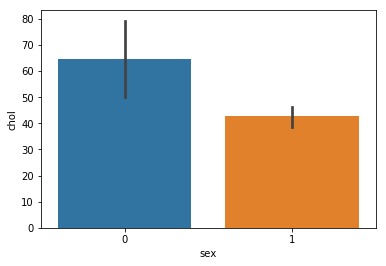

In [4]:
#preliminary figures to help understand the gist of the dataset
sns.barplot(x='sex',y='chol',data=hrt,estimator=np.std) #1 for male and 0 for female

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


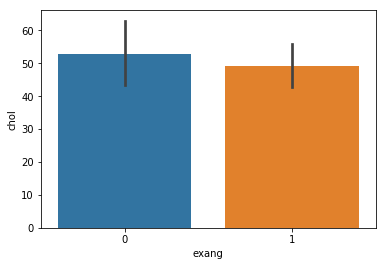

In [5]:
sns.barplot(x='exang',y='chol',data=hrt,estimator=np.std)
#exang= exercise-induced angina
#1 = yes & 0 = no

Text(0.5, 1.0, 'Sex vs Cholestrol levels & excercise induced angina')

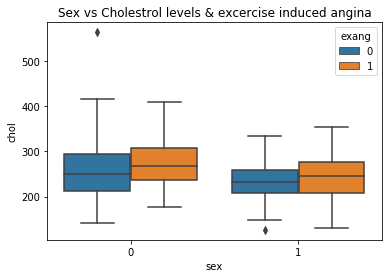

In [6]:
sns.boxplot(x='sex',y='chol',data=hrt,hue='exang').set_title('Sex vs Cholestrol levels & excercise induced angina')

Text(0.5, 1.0, 'Maximum heart rate vs Cholestrol levels & excercise induced angina')

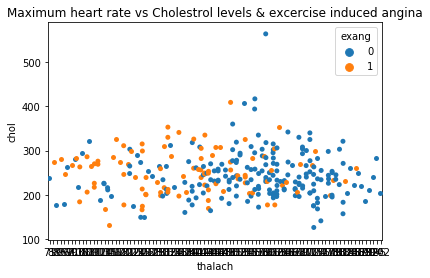

In [7]:
sns.stripplot(x='thalach',y='chol',data=hrt,hue='exang',dodge=True,jitter=True).set_title('Maximum heart rate vs Cholestrol levels & excercise induced angina')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


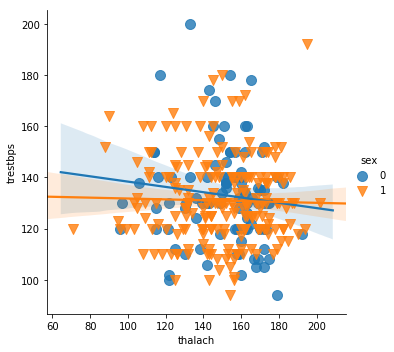

In [8]:
sns.lmplot(x='thalach',y='trestbps',data=hrt,hue='sex',markers=['o','v'],scatter_kws={'s':100})

In [9]:
label_quality=LabelEncoder()

In [10]:
hrt['exang']= label_quality.fit_transform(hrt['exang'])

In [11]:
hrt['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

Text(0.5, 1.0, 'exercise-induced angina')

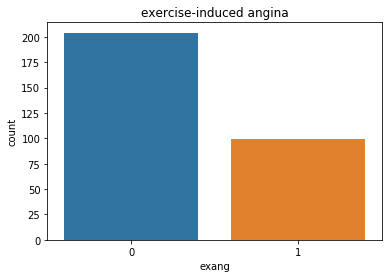

In [12]:
ax=sns.countplot(hrt['exang'])
ax.set_title('exercise-induced angina')

In [13]:
#separate the dataset as response variable(dependent variable) and feature variable(independent variable)
X= hrt.drop('exang', axis=1) #use all columns minus 'exang' as independent variables
y=hrt['exang'] #use 'exang' as dependent variable
#upper case 'X' and lowercase 'y' is the common-use

In [14]:
#Train and test splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#returns 4 variables

In [15]:
#applying standard scaling to get optimized results
sc= StandardScaler()
'''this levels the playing field so columns with big values (e.g.chol) 
dont get a prefrence over columns with smaller values (e.g. oldpeak)'''
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [16]:
#Random Forest Classifier
rfc= RandomForestClassifier(n_estimators=200) #how many models do I need/trees in the forest 
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [17]:
#Let's see how the model performs
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test ,pred_rfc))
#good at predicting when exercise-induced angina doesn't happen but not good at predicting when it does.

              precision    recall  f1-score   support

           0       0.78      0.82      0.79        38
           1       0.67      0.61      0.64        23

   micro avg       0.74      0.74      0.74        61
   macro avg       0.72      0.71      0.72        61
weighted avg       0.73      0.74      0.74        61

[[31  7]
 [ 9 14]]


In [18]:
#SVM Classifier
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [19]:
#Let's see how the model performs
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test ,pred_clf))
#worse percision than RFC

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        38
           1       0.67      0.52      0.59        23

   micro avg       0.72      0.72      0.72        61
   macro avg       0.71      0.68      0.69        61
weighted avg       0.71      0.72      0.71        61

[[32  6]
 [11 12]]


In [20]:
# Neural Networks
mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=200)
#3 layers of 11 nodes #more hidden layers= more resources but can lead to overfitting #normal amount of iterations are 200
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
#Let's see how the model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test ,pred_mlpc))
#better percision for predicting when exercise-induced angina doesn't happen, but much worse at predicting when it should

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.61      0.48      0.54        23

   micro avg       0.69      0.69      0.69        61
   macro avg       0.67      0.65      0.65        61
weighted avg       0.68      0.69      0.68        61

[[31  7]
 [12 11]]


# Testing the same models after excluding certain independent variables

In [22]:
X= hrt.drop(['exang','sex','oldpeak','target'], axis=1)#use all columns minus 'exang', 'sex', 'oldpeak', and 'target' as independent variables
y=hrt['exang'] #use 'exang' as dependent variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
sc= StandardScaler()
'''this levels the playing field so columns with big values (e.g.chol) 
dont get a prefrence over columns with smaller values (e.g. oldpeak)'''
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [25]:
#Random Forest Classifier
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [26]:
#Let's see how the model performs
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test ,pred_rfc))
#worse than initial

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.68      0.65      0.67        23

   micro avg       0.75      0.75      0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61

[[31  7]
 [ 8 15]]


In [27]:
#SVM Classifier
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [28]:
#Let's see how the model performs
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test ,pred_clf))
#slightly better percision than inital

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.68      0.57      0.62        23

   micro avg       0.74      0.74      0.74        61
   macro avg       0.72      0.70      0.71        61
weighted avg       0.73      0.74      0.73        61

[[32  6]
 [10 13]]


In [29]:
# Neural Networks
mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=200)
#3 layers of 11 nodes
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
#Let's see how the model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test ,pred_mlpc))
#better percision than initial

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.68      0.65      0.67        23

   micro avg       0.75      0.75      0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61

[[31  7]
 [ 8 15]]


In [31]:
'''after dropping the independent variables sex, oldpeak, and target, 
the SVM and Neural network models both performed slightly better than before,
but the Random Forest model performed slightly worse'''

'after dropping the independent variables sex, oldpeak, and target, \nthe SVM and Neural network models both performed slightly better than before,\nbut the Random Forest model performed slightly worse'